## Market Price Analysis for Smallholder Commercial Farmers
### Business Problem
Smallholder Commercial Farmers are in need of live data updates on market prices on their commodities, to inform them on seasonal/monthly market price performance and ideal markets to sell to/in.
### Objective
The objective is to analyze narket price data over the last 3 years (1st October 2021 - 30thSeptember 2024), present these findings, insights and recommendations,along with a live weekly update on market prices, to adequately respond to the business case above.
### Data Source and Scope
#### Data Source
Information on where the data was obtained is [KAMIS](https://amis.co.ke/site/market)
#### Geographical Scope
The counties to analyze the products from are Nairobi, Nyandarua, Nakuru, Meru and Kirinyaga Counties.
#### Commodities Scope
The products to analyze are Dry Maize, White Irish Potatoes, Dry Onions, Watermelons, Ripe Bananas, Oranges, Mangoes, Kales, Regular Spinach and Cooking Bananas
#### Analysis Approach
##### Key Questions
* What are the seasonal (quarterly) and monthly trends?
* What are the best and worst times of the year to sell these commodities and why?
* Which are the top 3 priced markets per county?
* What is today’s wholesale and retail price in each county?

### Data Collection
Lets start by importing the necesssary libraries

In [1]:
#Importing the libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

* Scraping data from the website is faster and more efficient than manually exporting it to Excel. To begin, it’s essential to understand the website structure. For instance, the first page URL for Dry Maize is **"https://amis.co.ke/site/market/0?product=1&per_page=3000",** which contains data from 18/12/2024 to 15/02/2024. The final page URL is **https://amis.co.ke/site/market/18000?product=1&per_page=3000,** with pages incrementing by 3000. This means we need to iterate through URLs starting from 0 to 18000 with a step of 3000 to collect all the data.

* Another thing to note is each product on the website has a unique ID, which allows us to scrape data for multiple products efficiently. For example, Dry Maize has an ID of 1, White Irish Potatoes is 163, Dry Onions is 158, and so on. Other product IDs include Watermelons (150), Ripe Bananas (226), Oranges (127), Mangoes (147), Kales (154), Regular Spinach (161), and Cooking Bananas (255). By mapping these products to their respective IDs, we can automate the scraping process for all products iteratively.

* Let’s begin the scraping process!

In [2]:
#lets map the Product Ids with their corresponding Product names
products = {
    1: "Dry Maize",
    163: "White Irish Potatoes",
    158: "Dry Onions",
    150: "Watermelons",
    226: "Ripe Bananas",
    127: "Oranges",
    147: "Mangoes",
    154: "Kales",
    161: "Regular Spinach",
    255: "Cooking Bananas"
}

#creating the base url
base_url = "https://amis.co.ke/site/market/{start}?product={product}&per_page=3000"

#creating the headers for the request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}

#initializing an empty list to store all our scraped data
all_data = []

#looping through each product
for product_id, product_name in products.items():
    print(f"Scraping data for {product_name} (Product ID: {product_id})...")
    
    #scraping all pages for the current product
    start_values = [0, 3000, 6000, 9000, 12000, 15000, 18000]
    for start in start_values:
        url = base_url.format(start=start, product=product_id)
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = bs(response.content, "html.parser")
            table = soup.find("table", class_="table table-bordered table-condensed")
            if table:
                for row in table.find("tbody").find_all("tr"):
                    cells = [td.text.strip() for td in row.find_all("td")]
                    all_data.append(cells)
            else:
                print(f"No table found for {url}")
        else:
            print(f"Failed to retrieve {url}, status code: {response.status_code}")

#extracting column headers for our dataframe
columns = [th.text.strip() for th in table.find("thead").find_all("th")]

#creating the dataframe
df = pd.DataFrame(all_data, columns=columns)

#lets save the dataframe as csv
df.to_csv(r"C:\Users\USER\Desktop\Scraping\Products.csv",index=False)

Scraping data for Dry Maize (Product ID: 1)...
Scraping data for White Irish Potatoes (Product ID: 163)...
Scraping data for Dry Onions (Product ID: 158)...
Scraping data for Watermelons (Product ID: 150)...
No table found for https://amis.co.ke/site/market/15000?product=150&per_page=3000
No table found for https://amis.co.ke/site/market/18000?product=150&per_page=3000
Scraping data for Ripe Bananas (Product ID: 226)...
Scraping data for Oranges (Product ID: 127)...
Scraping data for Mangoes (Product ID: 147)...
No table found for https://amis.co.ke/site/market/18000?product=147&per_page=3000
Scraping data for Kales (Product ID: 154)...
Scraping data for Regular Spinach (Product ID: 161)...
No table found for https://amis.co.ke/site/market/18000?product=161&per_page=3000
Scraping data for Cooking Bananas (Product ID: 255)...


### Data Processing
Lest examine the data to verify its accuracy and ensure consistency before proceeding with the analysis.

In [3]:
display(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nData types: {df.dtypes}")

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Dry Maize,White Maize,-,-,Kakamega Town,30.00/Kg,42.50/Kg,10000.00,Kakamega,2024-12-25
1,Dry Maize,White Maize,-,-,Ngurubani Market,36.67/Kg,40.00/Kg,8200.00,Kirinyaga,2024-12-24
2,Dry Maize,White Maize,-,-,Holo,40.00/Kg,55.00/Kg,,Kisumu,2024-12-24
3,Dry Maize,White Maize,-,-,Kerugoya,35.00/Kg,60.00/Kg,4800.00,Kirinyaga,2024-12-24
4,Dry Maize,White Maize,-,-,Molo,-,30.00/Kg,1600.00,Nakuru,2024-12-24



Dataset shape: (192507, 10)

Data types: Commodity         object
Classification    object
Grade             object
Sex               object
Market            object
Wholesale         object
Retail            object
Supply Volume     object
County            object
Date              object
dtype: object


* Lets begin data cleaning process by renaming columns, modifying data types and standardizing column values.

In [4]:
#Renaming the columns
df.columns =["Product","Classification","Grade","Sex","Market Area","Wholesale Price","Retail Price","Quantity Supplied","County Area","Date"]

#Dropping the unnecessary columns 
df.drop(columns =["Classification","Grade","Sex"],inplace=True)

#changing the data type of Date
df["Date"] =pd.to_datetime(df["Date"],format="%Y-%m-%d")

#getting values and changing data types
for col in df[["Wholesale Price", "Retail Price","Quantity Supplied"]]:
    df[col] = df[col].str.extract(r"([\d\.]+)", expand=False) 
    df[col] = df[col].astype(float)  

#dropping the Nan/Missing values
df.dropna(subset=["Wholesale Price","Retail Price","Quantity Supplied"],inplace=True)

#Subsetting the dataframe to our specified timeline of analysis
start_date ="2021-10-01"
end_date ="2024-09-30"

#lets create a complete list of our dates
full_dates = pd.date_range(start=start_date, end=end_date, freq="D")

#lets create a dataFrame for the dates and product names
new_df = pd.MultiIndex.from_product([full_dates, df["Product"].unique()],names=["Date", "Product"]).to_frame(index=False)

#Merging the complete DataFrame with the original data
df = pd.merge(new_df, df, on=["Date", "Product"], how="left")

#Dropping the missing values
df =df.dropna()

#Subsetting the dataframe to the specific geographical scope
counties =["Nairobi","Nyandarua","Nakuru","Meru","Kirinyaga"]
df =df[df["County Area"].isin(counties)]

* Lets check the new dataset to ensure its tidy.

In [5]:
display(df.head())
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"\nNumber of missing values: {df.isna().sum()}")
print(f"\nDate ranges: {df.groupby("Product")["Date"].agg(["max","min"])}")
print(f"\nCounties present: {df["County Area"].unique()}")

,Date,Product,Market Area,Wholesale Price,Retail Price,Quantity Supplied,County Area
0,2021-10-01,Dry Maize,Ngurubani Market,25.00,31.0,3700.0,Kirinyaga
19,2021-10-01,Dry Maize,Nakuru Wakulima,40.00,45.0,900.0,Nakuru
20,2021-10-01,Dry Maize,Nakuru Wakulima,28.89,35.0,9000.0,Nakuru
21,2021-10-01,Dry Maize,Nakuru Wakulima,136.00,150.0,750.0,Nakuru
22,2021-10-01,Dry Maize,Gakoromone,33.33,40.0,5000.0,Meru



Dataset has 18297 rows and 7 columns

Number of missing values: Date                 0
Product              0
Market Area          0
Wholesale Price      0
Retail Price         0
Quantity Supplied    0
County Area          0
dtype: int64

Date ranges:                             max        min
Product                                   
Banana (Cooking)     2024-09-30 2021-10-01
Banana (Ripening)    2024-09-30 2021-10-01
Dry Maize            2024-09-30 2021-10-01
Dry Onions           2024-09-30 2021-10-01
Kales/Sukuma Wiki    2024-09-30 2021-10-01
Mangoes              2024-09-12 2021-10-01
Oranges              2024-09-30 2021-10-01
Spinach              2024-09-30 2021-10-01
Water Melon          2024-09-30 2021-10-01
White Irish Potatoes 2024-09-30 2021-10-01

Counties present: ['Kirinyaga' 'Nakuru' 'Meru' 'Nyandarua' 'Nairobi']


* Our dataset is tidy and ready for analysis but first lets save the dataframe.

In [6]:
df.to_csv(r"C:\Users\USER\Desktop\Scraping\Tidy Products.csv",index=False)

### Exploratory Data Analysis
To analyze seasonal trends both quarterly and monthly, lets create new columns in the dataset for these time periods.

In [7]:
#Extracting the month names
df["Month"]=df["Date"].dt.month_name()

#Extracting the quarters
df["Quarter"] =df["Date"].dt.quarter

#lets rename the Quarter column for easier interpretation
def quarter(value):
    if value == 1:
        return "Q1"
    elif value == 2:
        return "Q2"
    elif value == 3:
        return "Q3"
    else:
        return "Q4"

df["Quarter"] =df["Quarter"].apply(quarter)

### What are the seasonal (quarterly) and monthly trends?
Let's create a function that will iterate through each product and visualize the trends for both quarters and months.

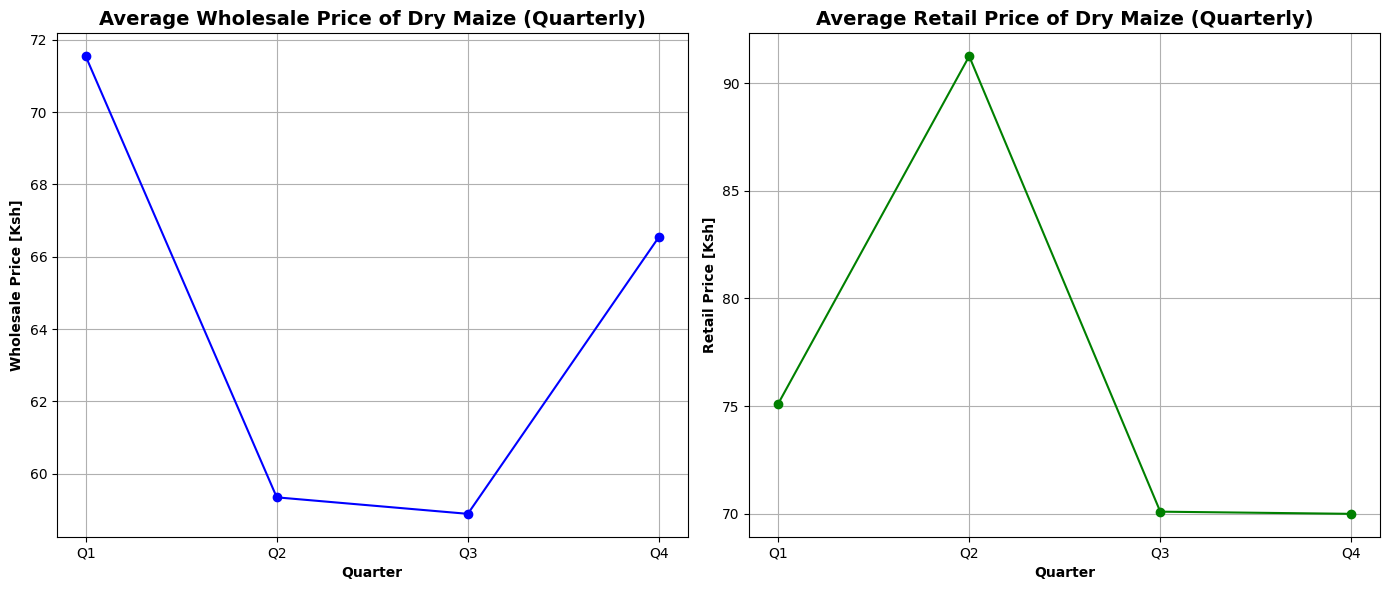

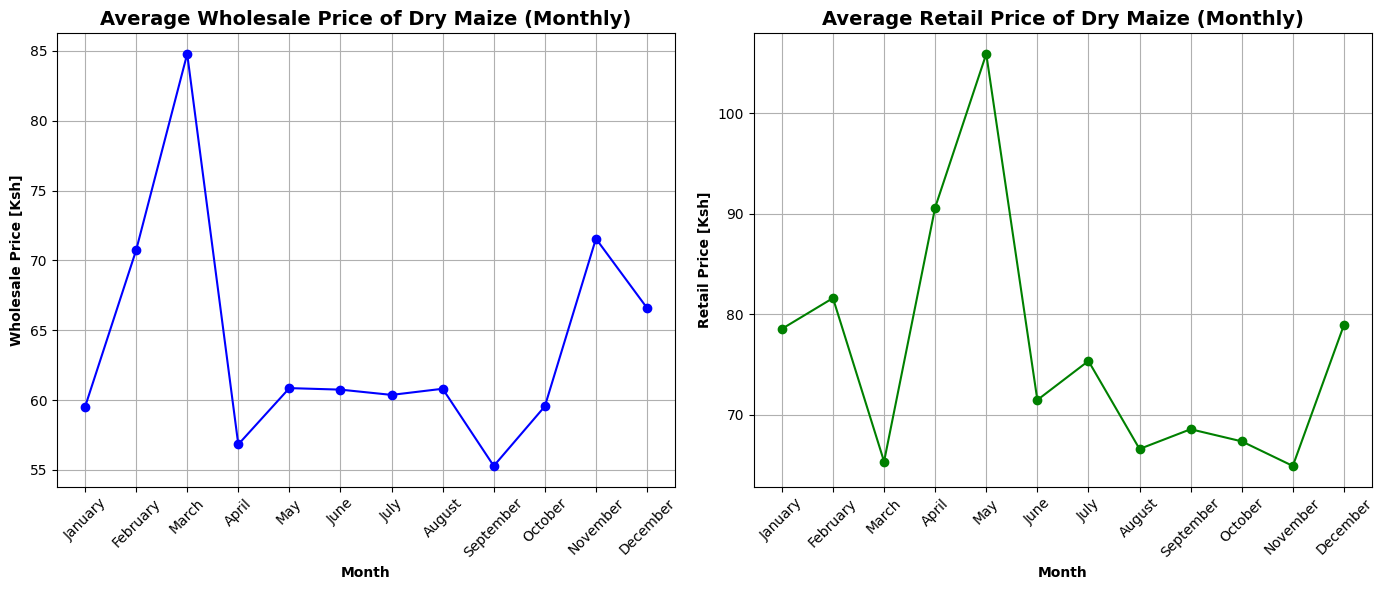

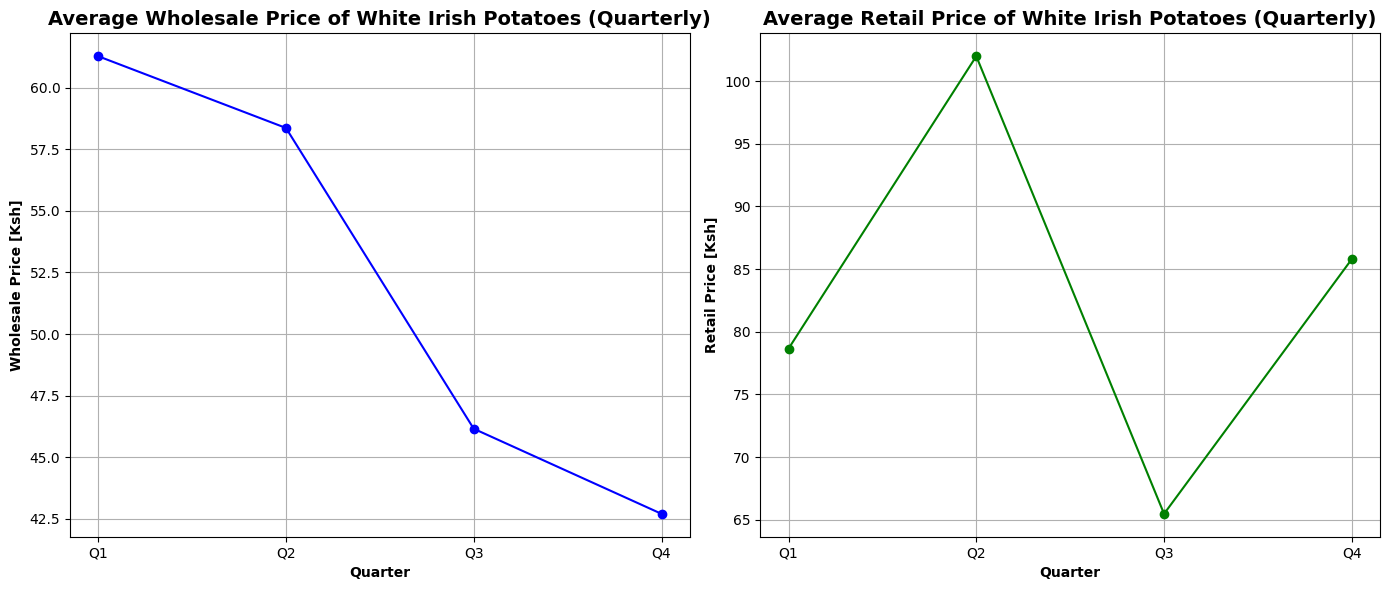

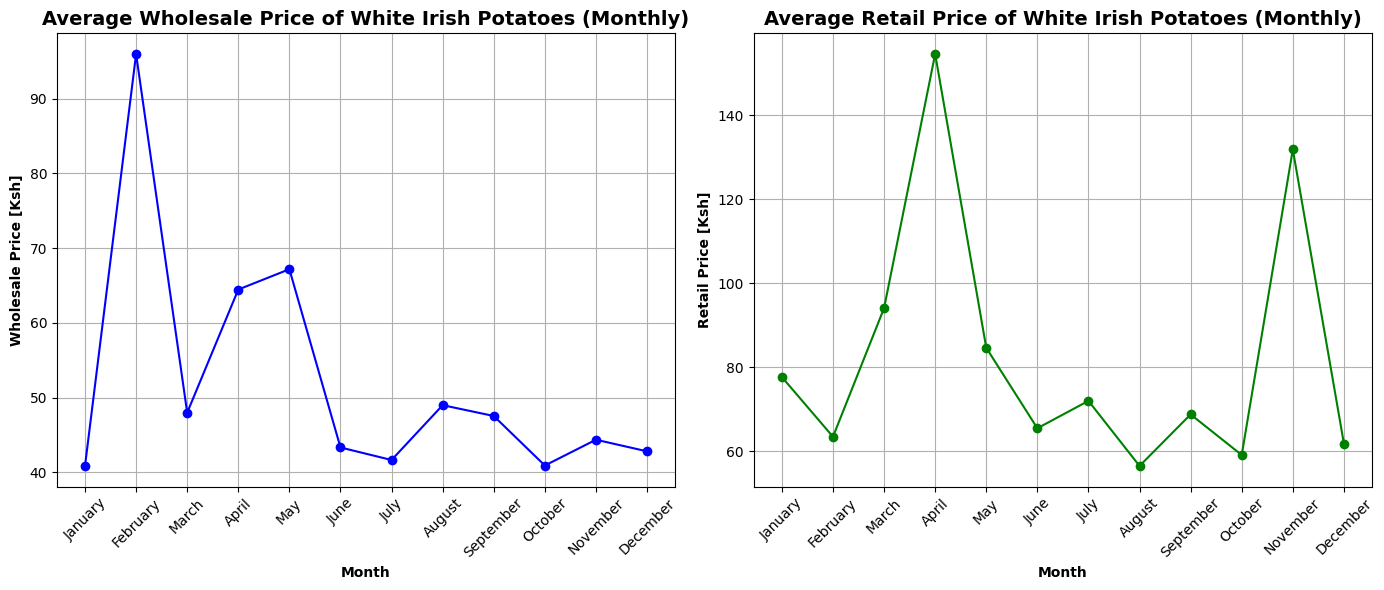

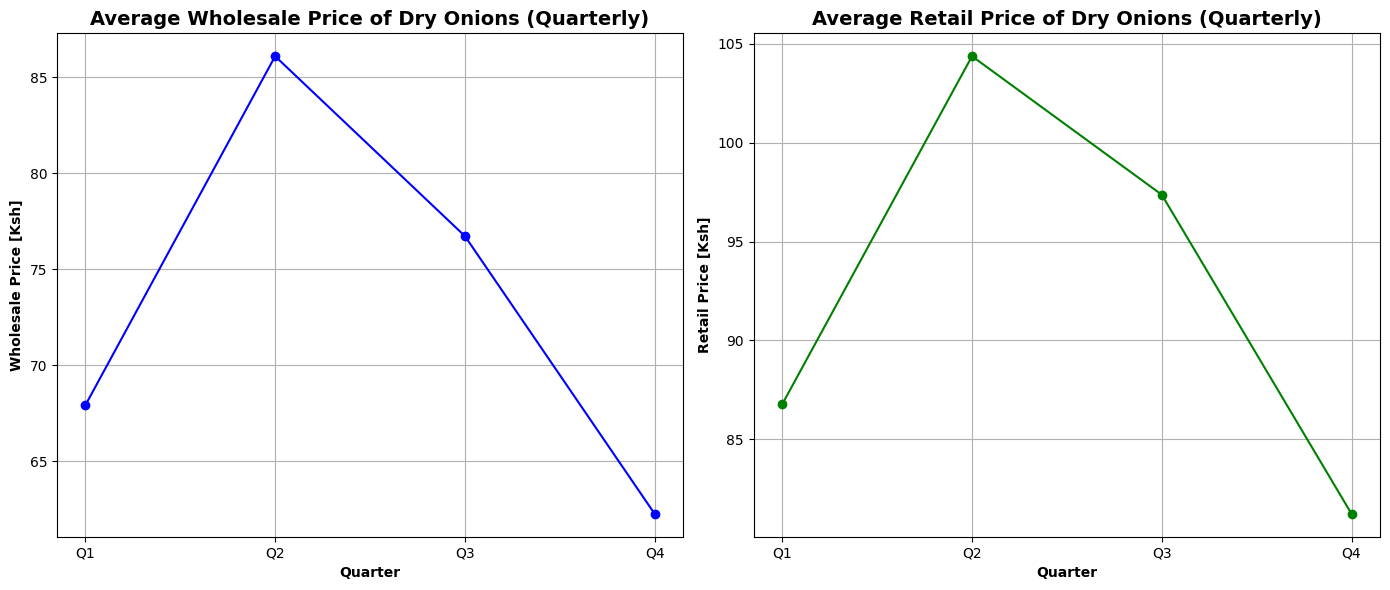

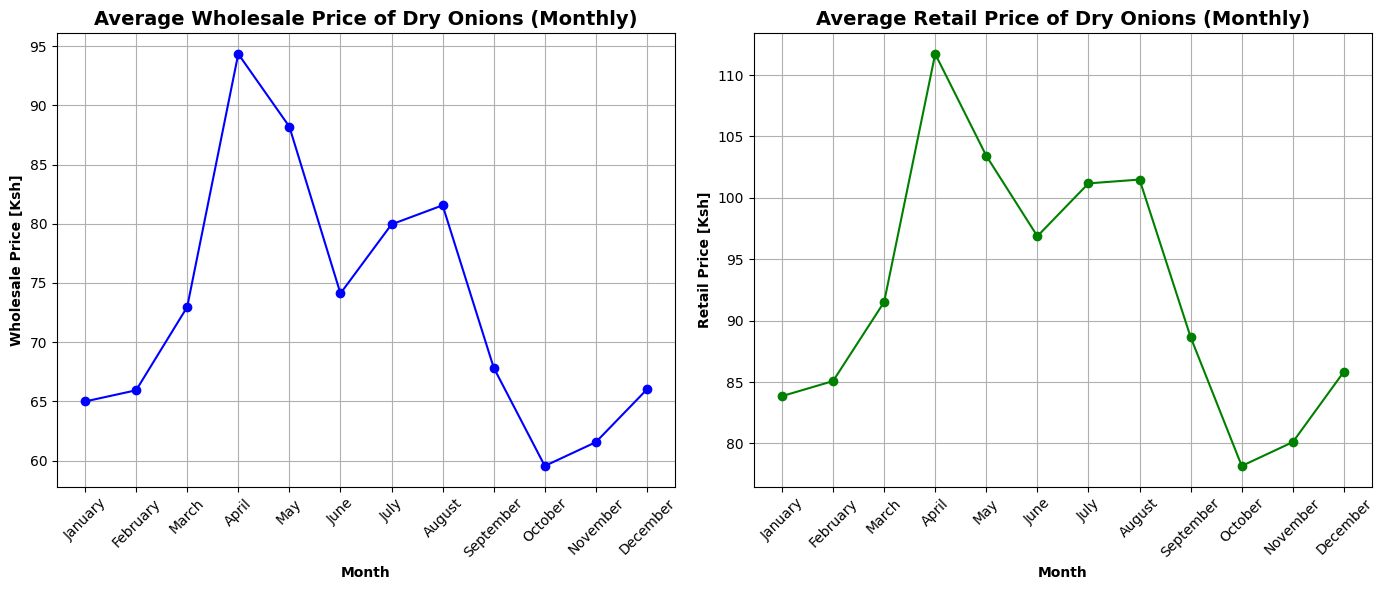

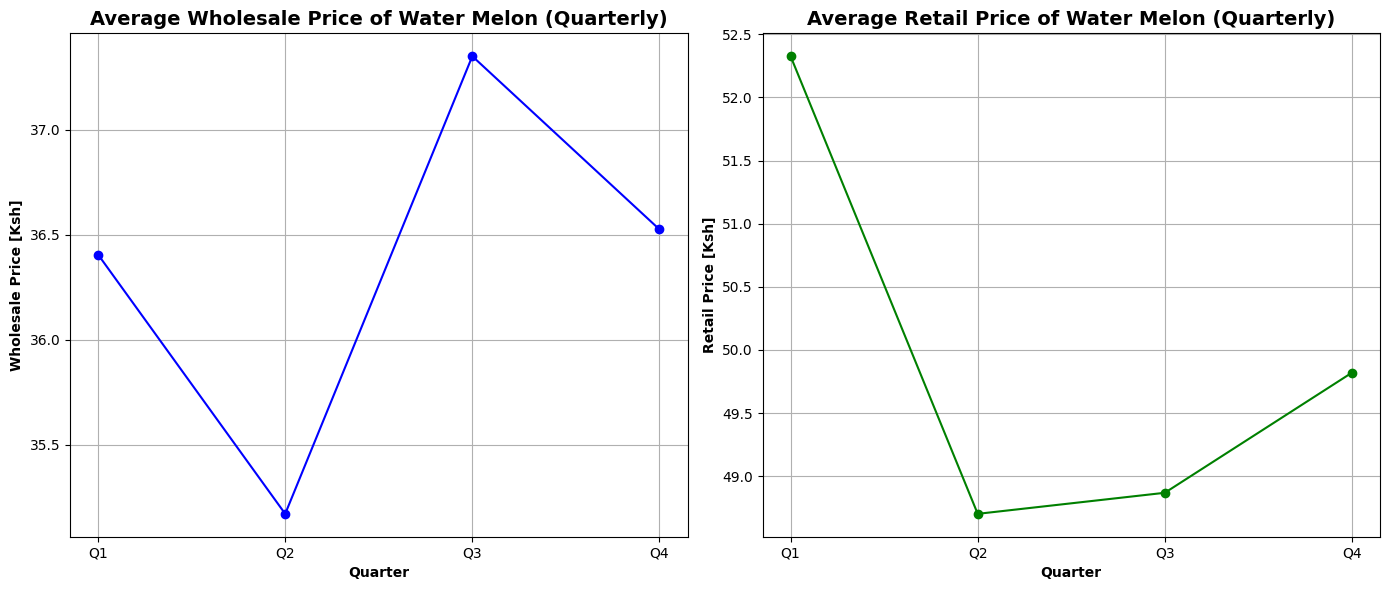

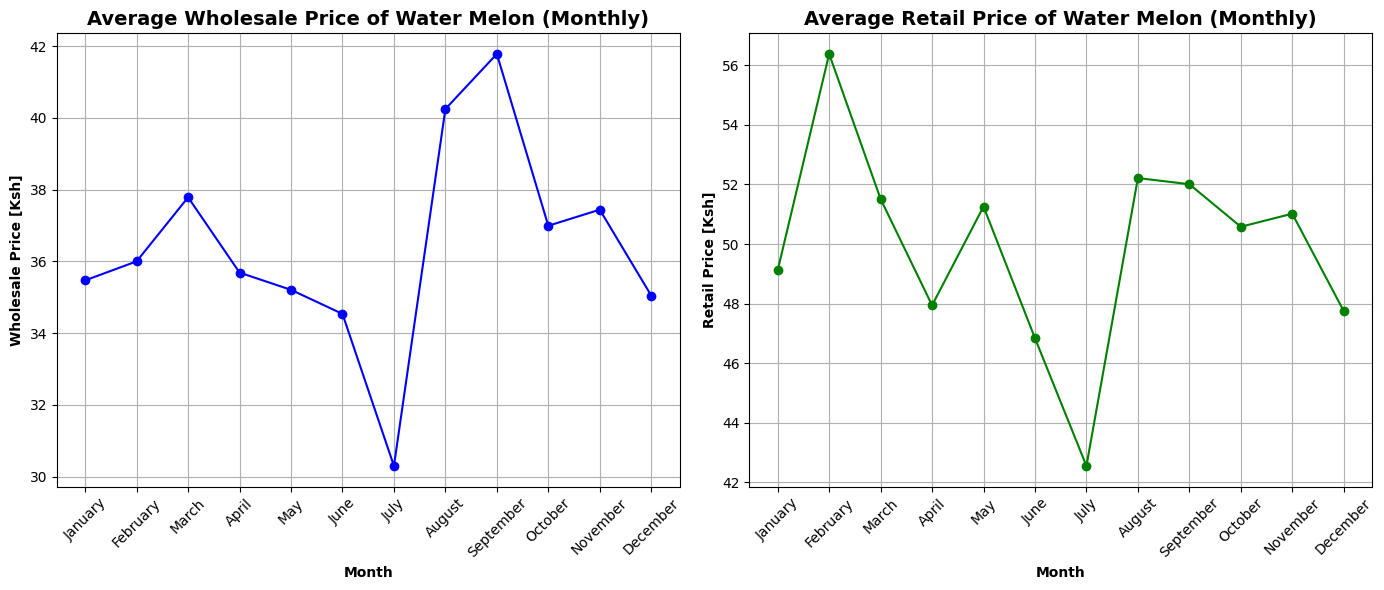

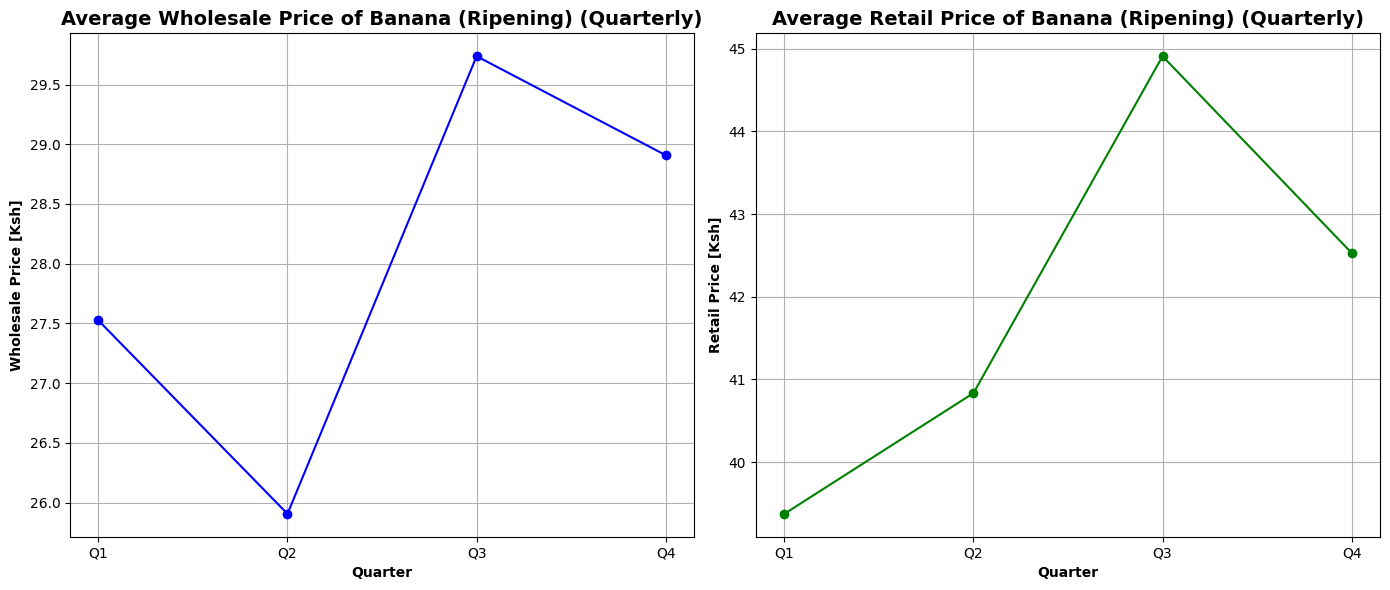

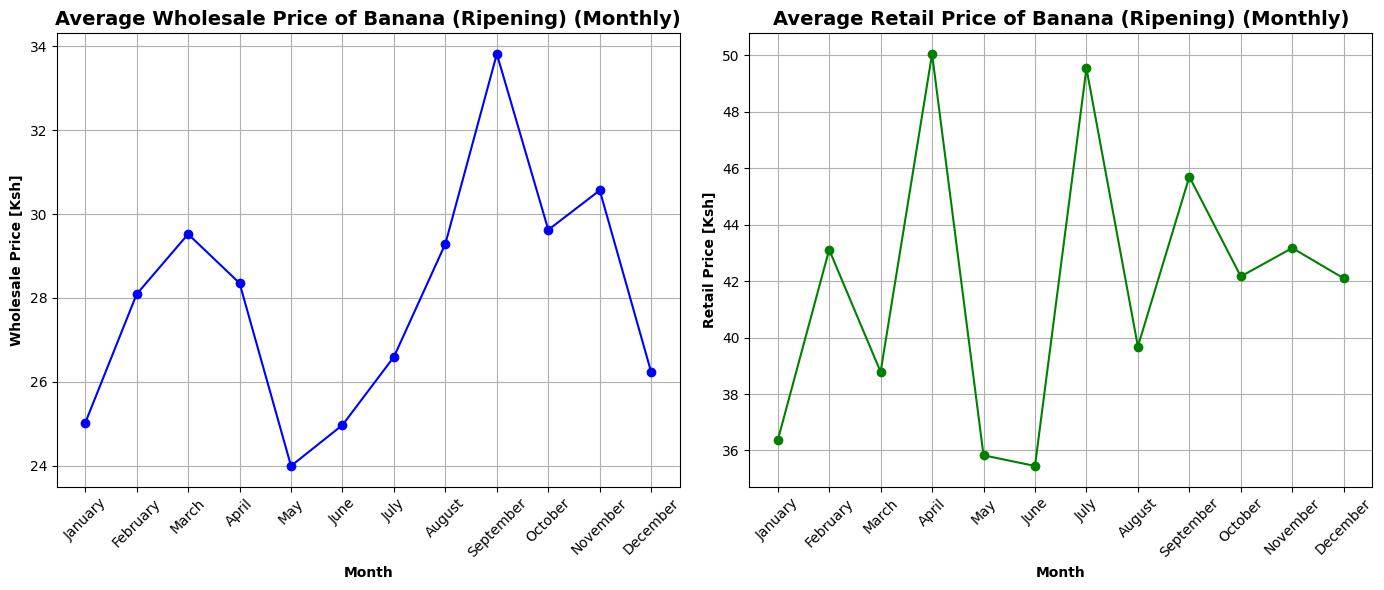

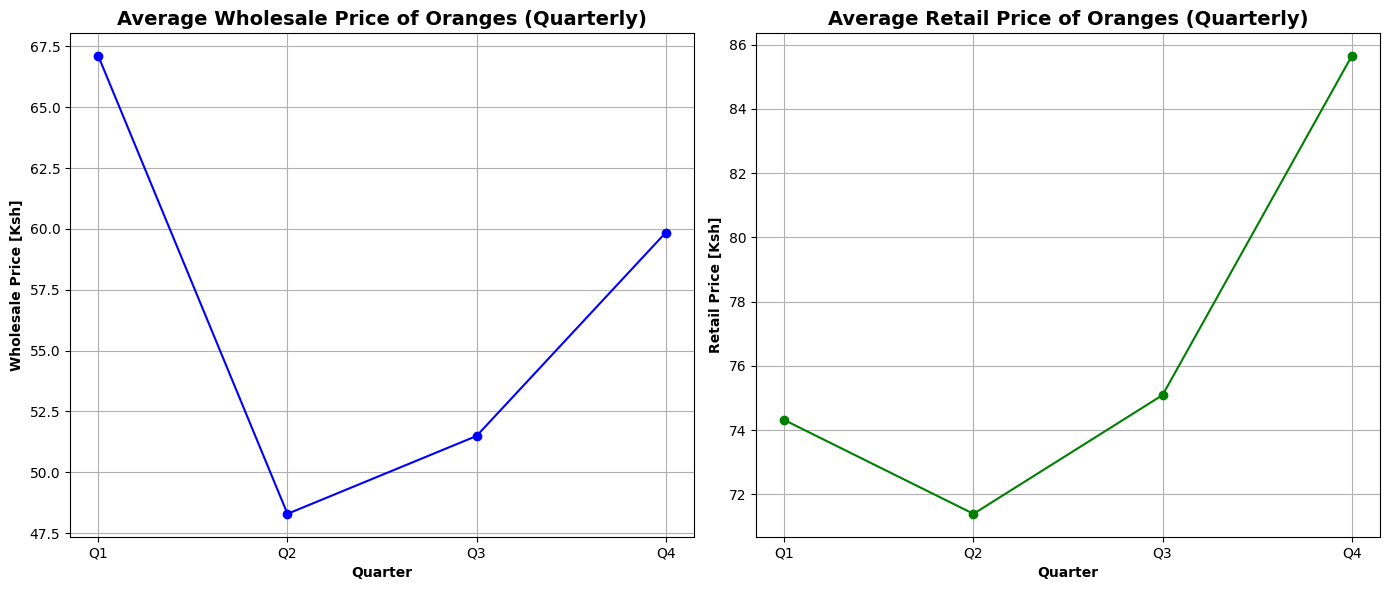

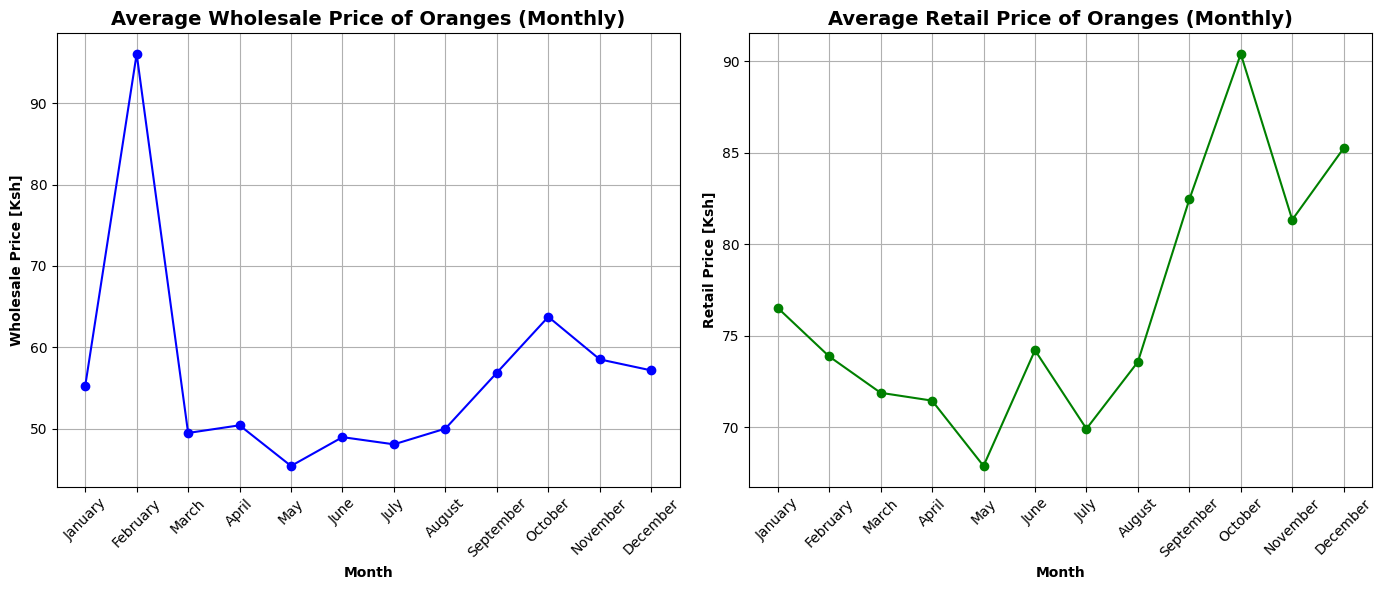

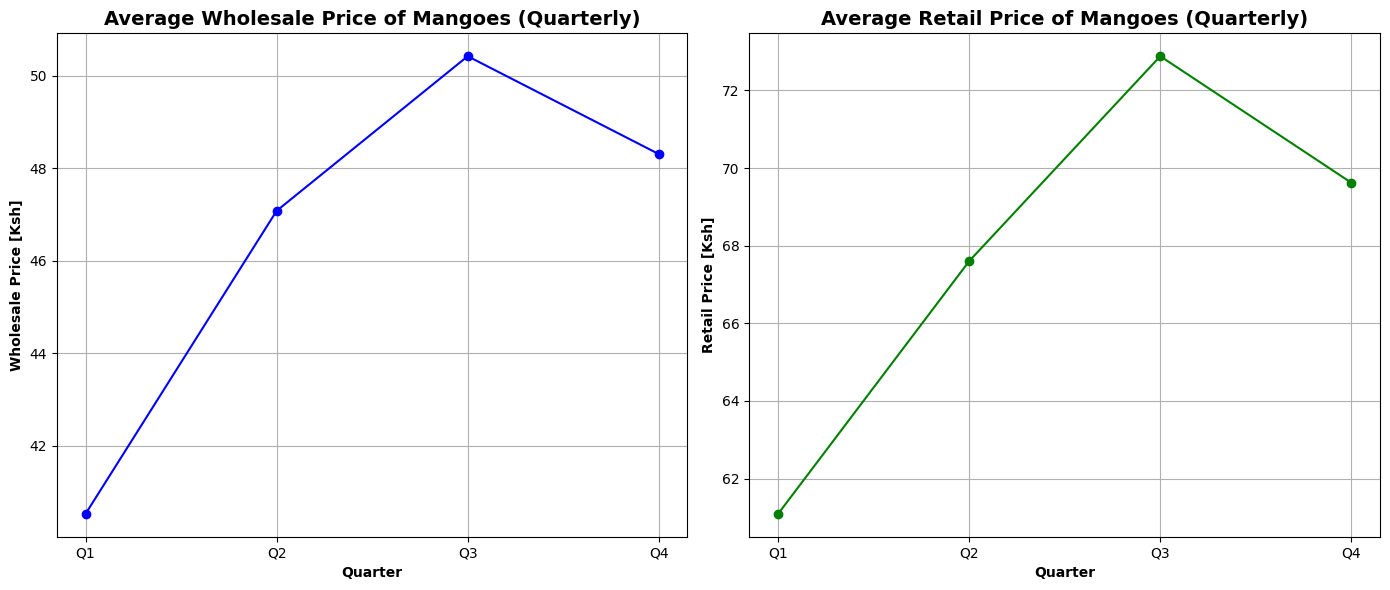

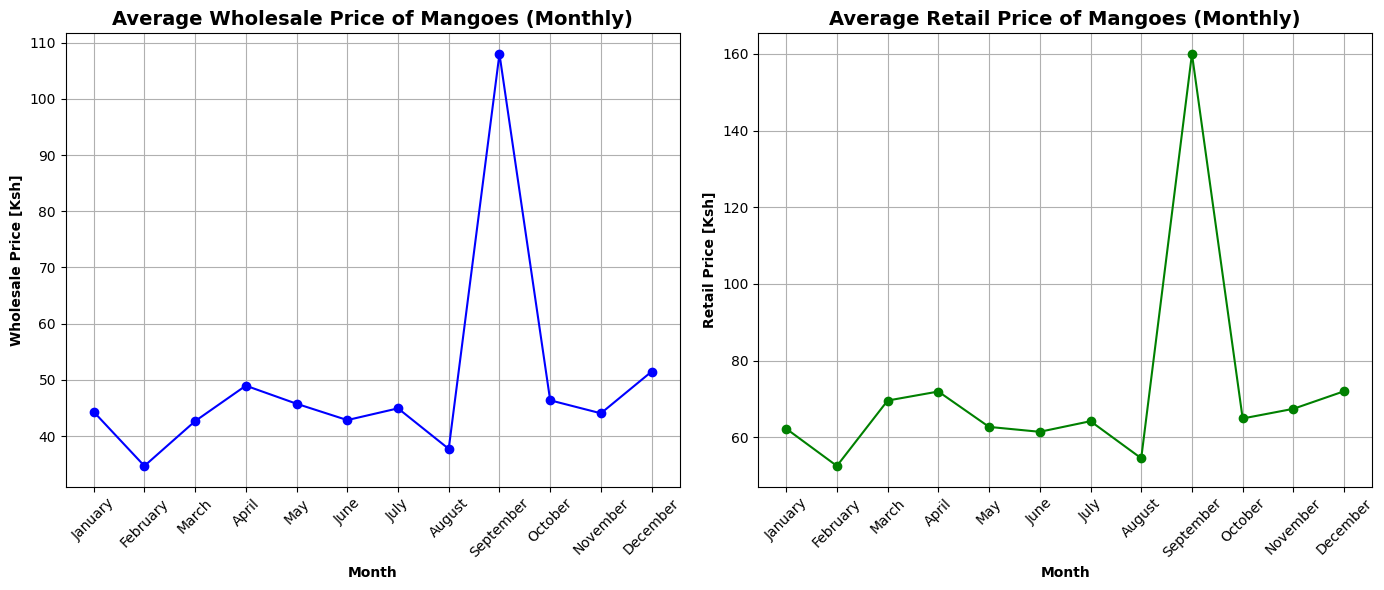

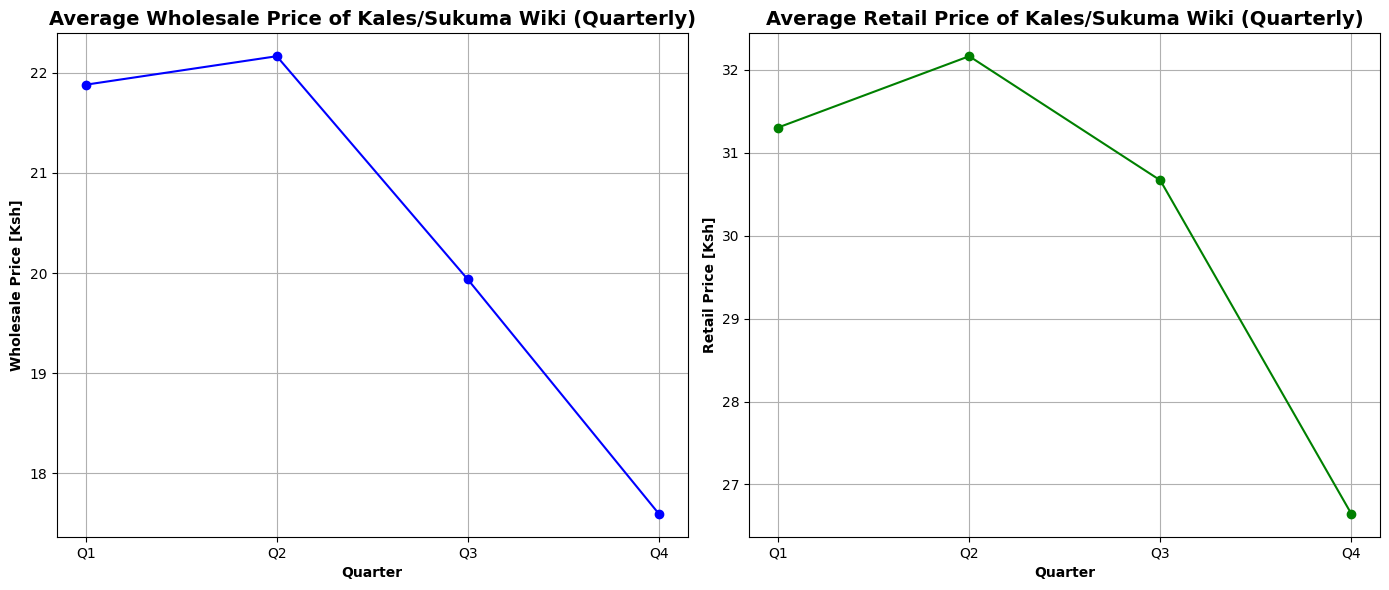

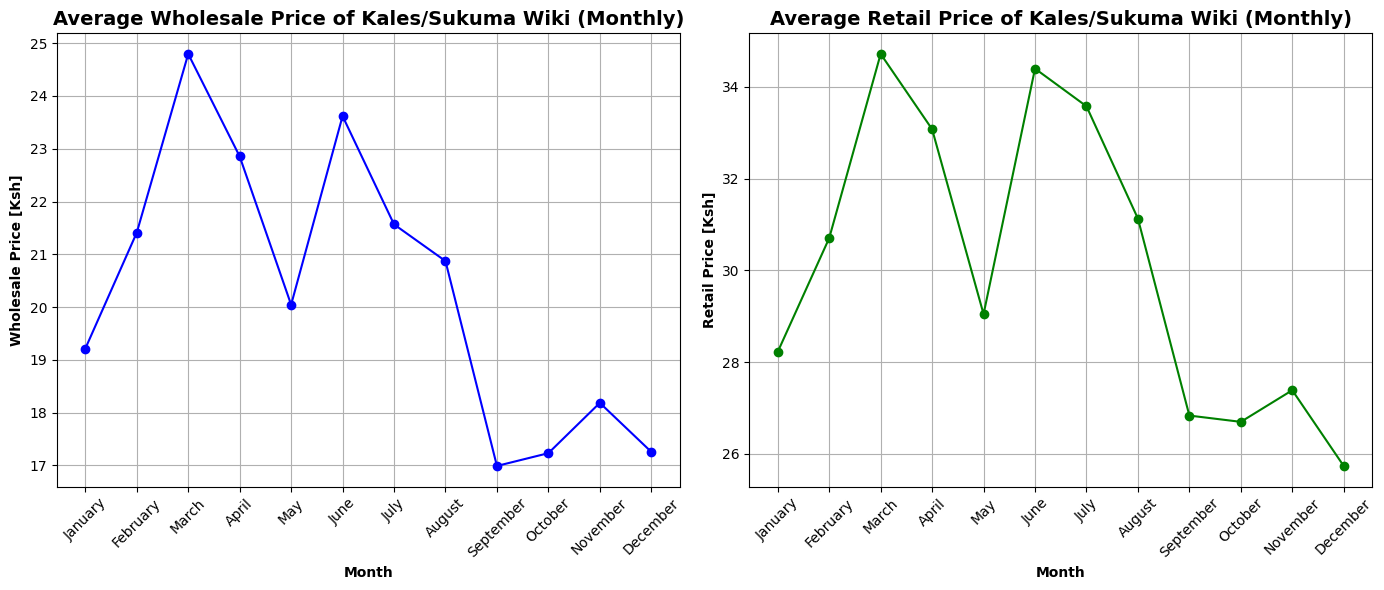

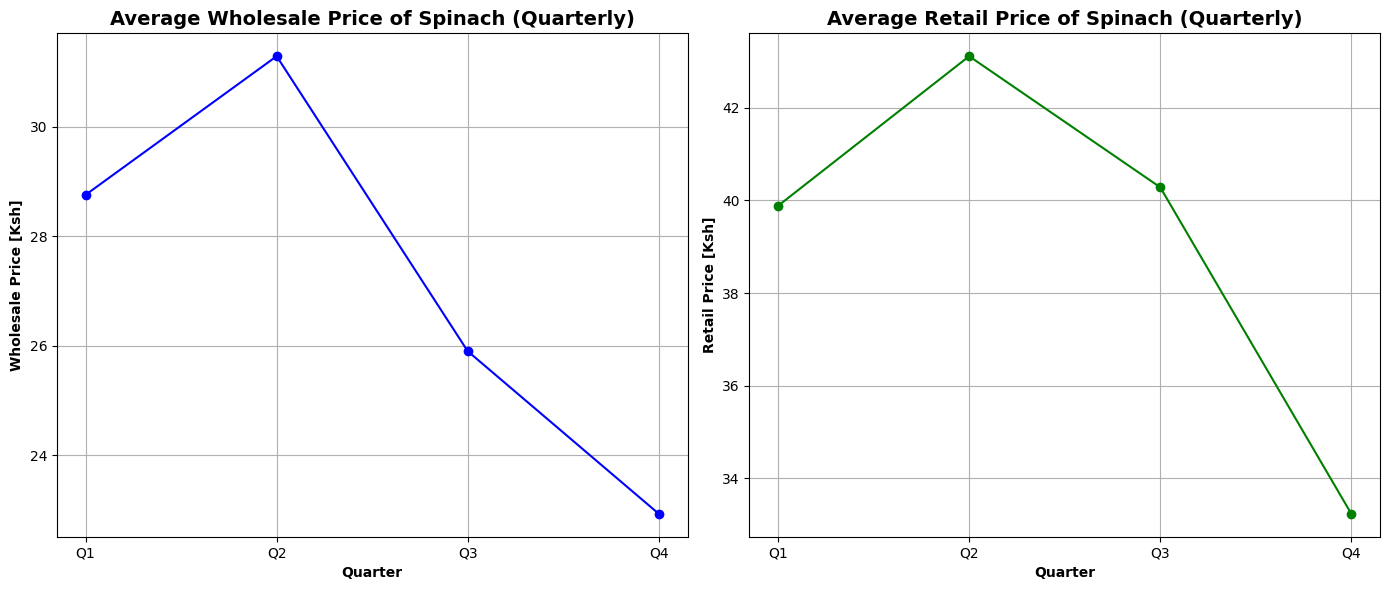

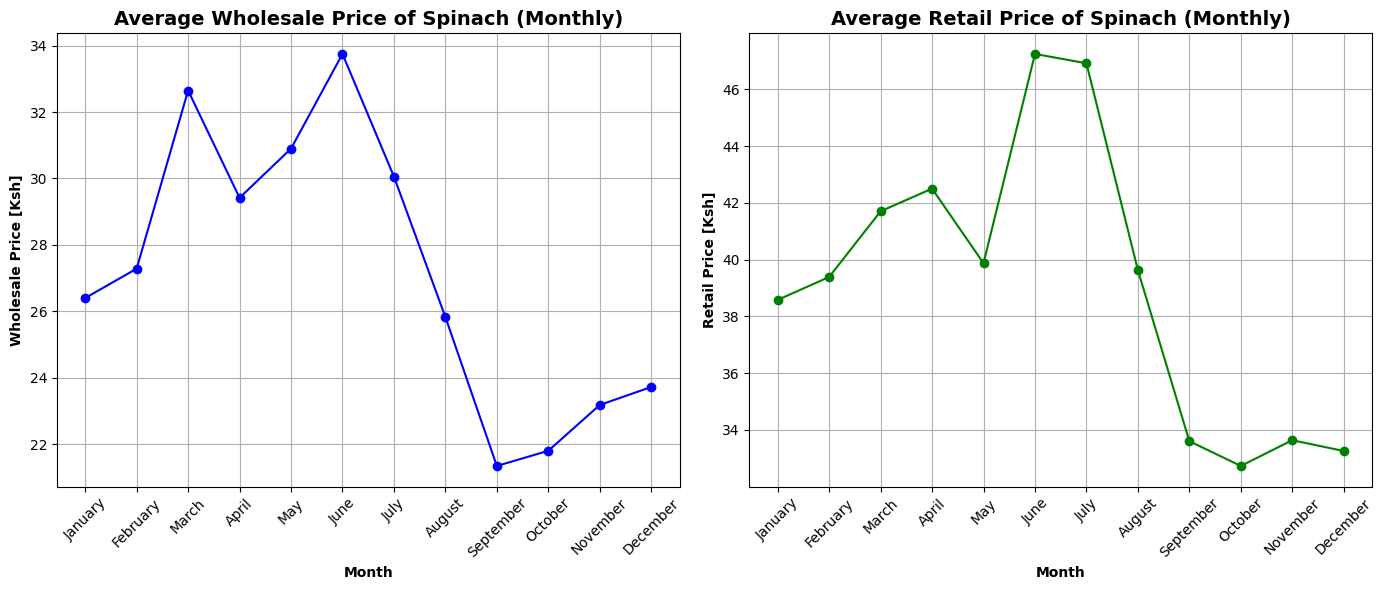

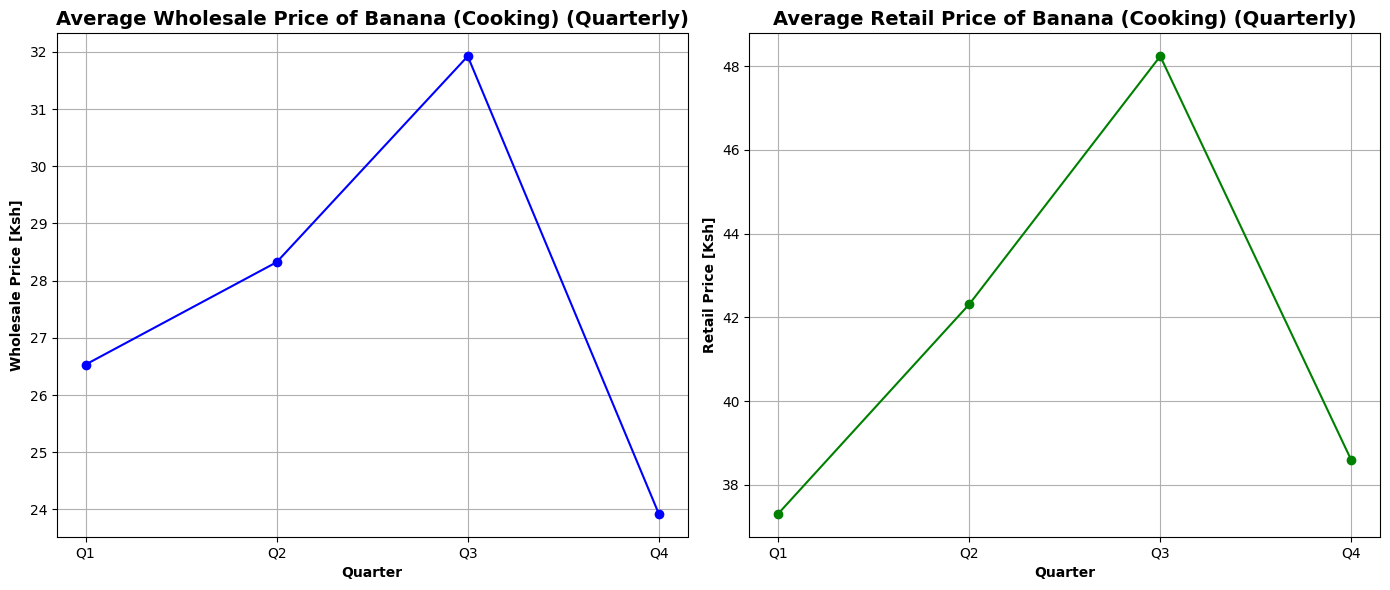

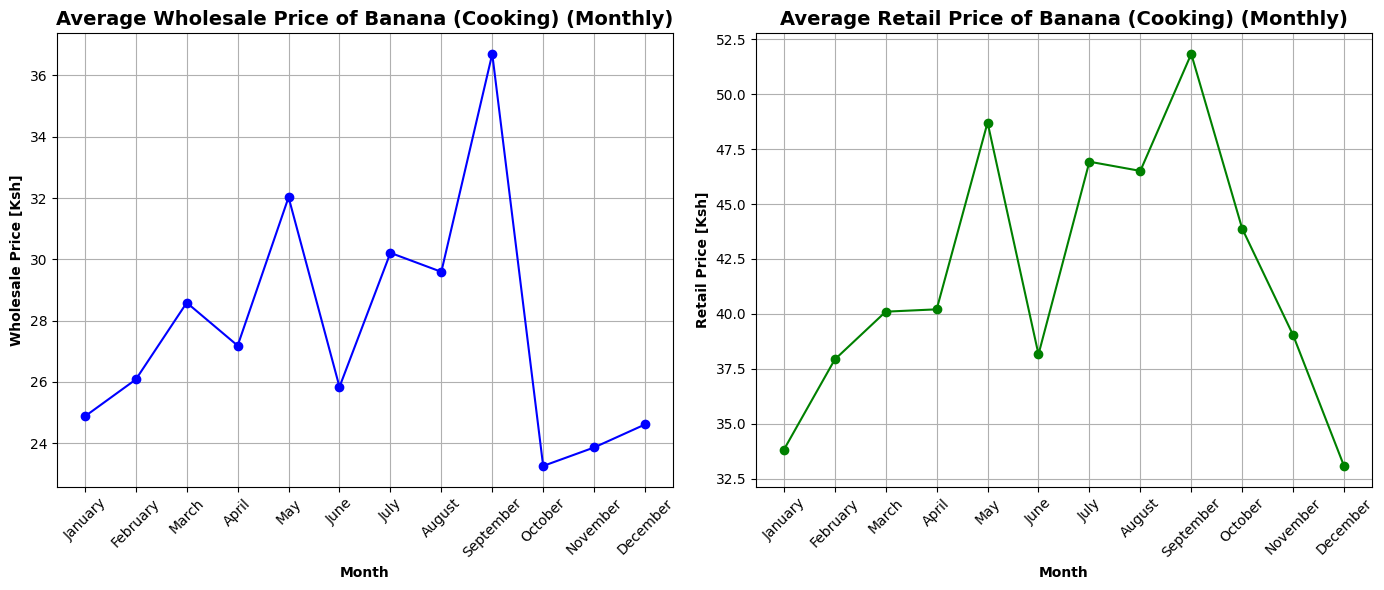

In [8]:
#Creating  the function
def visualize_product_price(df, product_name):
    """
    Visualizes the average quarterly and monthly wholesale and retail prices for a given product.

    Parameters:
        df (DataFrame): The data containing 'Quarter', 'Month', 'Wholesale Price', 'Retail Price', and 'Product'.
        product_name (str): The name of the product to visualize (e.g. 'Dry Maize').

    Returns:
        None
    """
    filtered_df = df[df["Product"] == product_name]

    #Quarterly Trends
    quart = filtered_df.groupby("Quarter")[["Wholesale Price", "Retail Price"]].mean().reset_index()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    #Plot for Wholesale Price
    ax1.plot(quart["Quarter"], quart["Wholesale Price"], marker="o", label="Wholesale Price", color="blue")
    ax1.set_title(f"Average Wholesale Price of {product_name} (Quarterly)", fontweight="bold", fontsize=14)
    ax1.set_xlabel("Quarter", fontweight="bold")
    ax1.set_ylabel("Wholesale Price [Ksh]", fontweight="bold")
    ax1.grid(True)

    #Plot for Retail Price
    ax2.plot(quart["Quarter"], quart["Retail Price"], marker="o", label="Retail Price", color="green")
    ax2.set_title(f"Average Retail Price of {product_name} (Quarterly)", fontweight="bold", fontsize=14)
    ax2.set_xlabel("Quarter", fontweight="bold")
    ax2.set_ylabel("Retail Price [Ksh]", fontweight="bold")
    ax2.grid(True)
    plt.tight_layout()
    plt.show()
    
    #Monthly Analysis
    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    filtered_df["Month"] = pd.Categorical(filtered_df["Month"], categories=month_order, ordered=True)
    month = filtered_df.groupby("Month")[["Wholesale Price", "Retail Price"]].mean().reset_index()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    #Plot for Wholesale Price
    ax1.plot(month["Month"], month["Wholesale Price"], marker="o", label="Wholesale Price", color="blue")
    ax1.set_title(f"Average Wholesale Price of {product_name} (Monthly)", fontweight="bold", fontsize=14)
    ax1.set_xlabel("Month", fontweight="bold")
    ax1.set_ylabel("Wholesale Price [Ksh]", fontweight="bold")
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)

    #Plot for Retail Price
    ax2.plot(month["Month"], month["Retail Price"], marker="o", label="Retail Price", color="green")
    ax2.set_title(f"Average Retail Price of {product_name} (Monthly)", fontweight="bold", fontsize=14)
    ax2.set_xlabel("Month", fontweight="bold")
    ax2.set_ylabel("Retail Price [Ksh]", fontweight="bold")
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True)
    plt.tight_layout()
    safe_product_name = product_name.replace("/", "_")
    #Saving the visuals
    plt.savefig(f"{safe_product_name}_monthly_prices.png", dpi=300)
    plt.show()

#Looping through the Products to visualize
products = ["Dry Maize", "White Irish Potatoes", "Dry Onions", "Water Melon","Banana (Ripening)", "Oranges", "Mangoes", "Kales/Sukuma Wiki","Spinach", "Banana (Cooking)"]
for product in products:
    visualize_product_price(df, product)

### Findings
* **Dry Maize:**
The average wholesale prices declined from Q1 to Q3 before gradually increasing while the average retail prices rose from Q1 to Q2, then dropped in Q3 and remained steady in Q4. The average monthly wholesale prices increased from January to March, dropped, and then rose steadily from September while average retail prices dropped from February to March, increased to May, then sharply dropped before rising again in the month of November.

* **White Irish Potatoes:**
The average wholesale prices steadily decreased from Q1 to Q4 while the average retail prices increased from Q1 to Q2, dropped in Q3, and then increased again. Monthly wholesale prices rose in January but dropped sharply in March before gradually increasing, followed by a drop whereas the average retail prices saw a sharp increase from February to April, then dropped, with a brief increase from October to November before declining in December.

* **Dry Onions:**
For Dry onions,both average wholesale and retail prices rose in Q1, followed by a gradual decrease from Q4. The average monthly prices for both wholesale and retail increased from January to April, dropped in June, rose again until August, then fell in October and rose in December.

* **Watermelons:**
The average wholesale prices dropped in Q1, increased until Q3, and then decreased while the average retail prices dropped in Q2 but gradually increased through Q4. The average monthly wholesale prices rose from January to March, then gradually declined until July, spiked from July to September, and decreased through December.The average retail prices rose in January, dropped through April, increased in May, dropped by July, and rose in August, followed by a gradual decline to December.

* **Ripening Banana:**
The average wholesale prices decreased in Q1, spiked in Q3, then gradually dropped through Q4 while the average retail prices steadily increased from Q1 to Q3, then dropped. For the monthly average wholesale prices,it increased from January to March, dropped until May, rose in September, and decreased gradually to December while the average retail prices increased from January to February, dropped in March, surged in April, then dropped through June, rose in July, fell in August and fluctuated through December.

* **Oranges:**
Both the average wholesale and retail prices dropped from Q1 to Q2, then gradually increased through Q4. The average monthly wholesale prices increased until February, then dropped in March, with a gradual decrease until August and rose from August to October and fell in December. The average retail prices decreased from January to May, then increased gradually until October, before dropping in November and rising in December.

* **Mangoes:** 
Both the average wholesale and retail prices increased from Q1 to Q3, then declined through Q4. Monthly average prices increased gradually until August, then rose sharply in September, dropped suddenly in October and increased steadily from October to December.

* **Kales/Sukuma Wiki:**
Both average wholesale and retail prices increased in Q1, then decreased from Q2 to Q4. Monthly average prices rose from January to March, then dropped until May, before increasing in June. Prices decreased from June onwards.

* **Spinach:**
Both average wholesale and retail prices increased in Q1, then decreased through Q4 starting in Q2. Monthly average prices increased from January to March, dropped in April, increased until June, and then decreased gradually through September, followed by an increase in December.

* **Cooking Banana:**
The average wholesale and retail prices increased from Q1 to Q3, then dropped. Monthly average wholesale prices increased gradually from January to May, then dropped in June, increased to September, and fell again in October. For the retail prices increased to December.

### What are the best and worst times of the year to sell these commodities and why?
To answer this, we need to identify when the prices were highest in the market, as our primary goal is to help farmers maximize their sales.

In [9]:
# Identify best/worst months for each product
price_stats = df.groupby(["Product", "Month"])[["Wholesale Price"]].mean()
best_months = price_stats.groupby("Product").idxmax()
worst_months = price_stats.groupby("Product").idxmin()

In [10]:
#Displaying the best times to sell
display(best_months)

,Wholesale Price
Product,
Banana (Cooking),"(Banana (Cooking), September)"
Banana (Ripening),"(Banana (Ripening), September)"
Dry Maize,"(Dry Maize, March)"
Dry Onions,"(Dry Onions, April)"
Kales/Sukuma Wiki,"(Kales/Sukuma Wiki, March)"
Mangoes,"(Mangoes, September)"
Oranges,"(Oranges, February)"
Spinach,"(Spinach, June)"
Water Melon,"(Water Melon, September)"


In [11]:
#Displaying the worst time to sell
display(worst_months)

,Wholesale Price
Product,
Banana (Cooking),"(Banana (Cooking), October)"
Banana (Ripening),"(Banana (Ripening), May)"
Dry Maize,"(Dry Maize, September)"
Dry Onions,"(Dry Onions, October)"
Kales/Sukuma Wiki,"(Kales/Sukuma Wiki, September)"
Mangoes,"(Mangoes, February)"
Oranges,"(Oranges, May)"
Spinach,"(Spinach, September)"
Water Melon,"(Water Melon, July)"


It’s always helpful to visualize data to gain clearer insights. Let’s create a function to iterate through each product and illustrate the best and worst times to sell them.

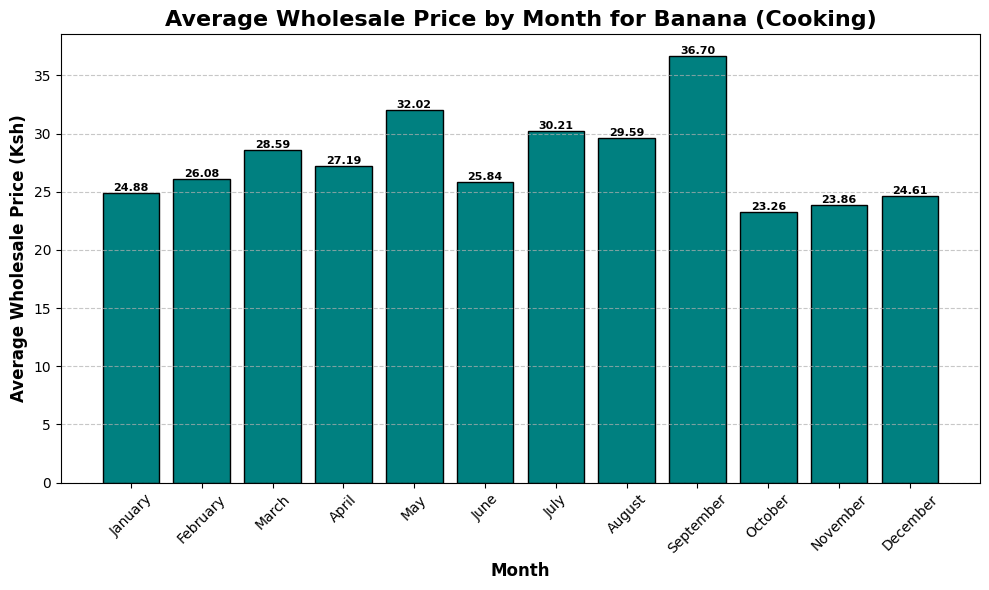

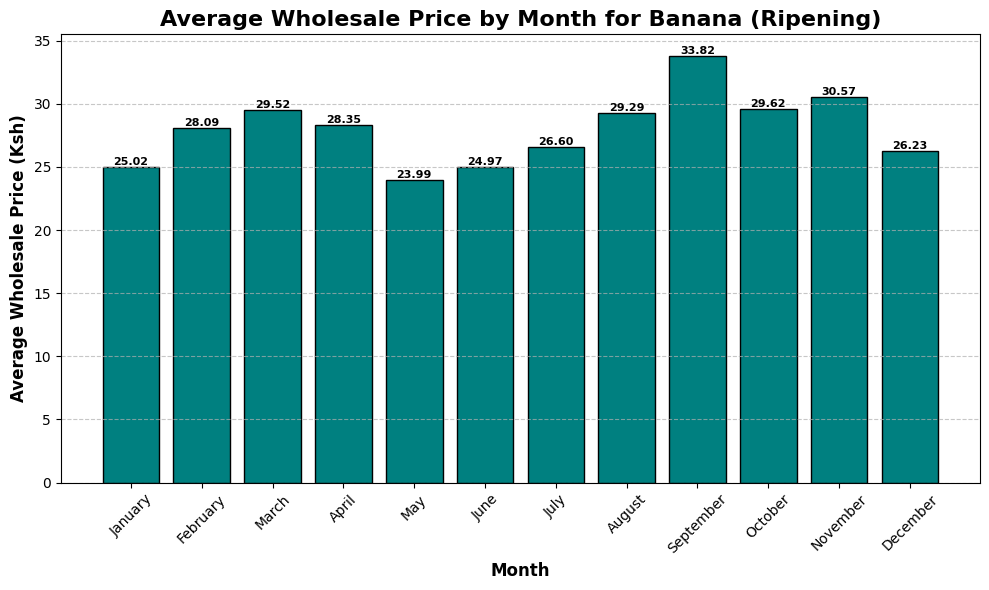

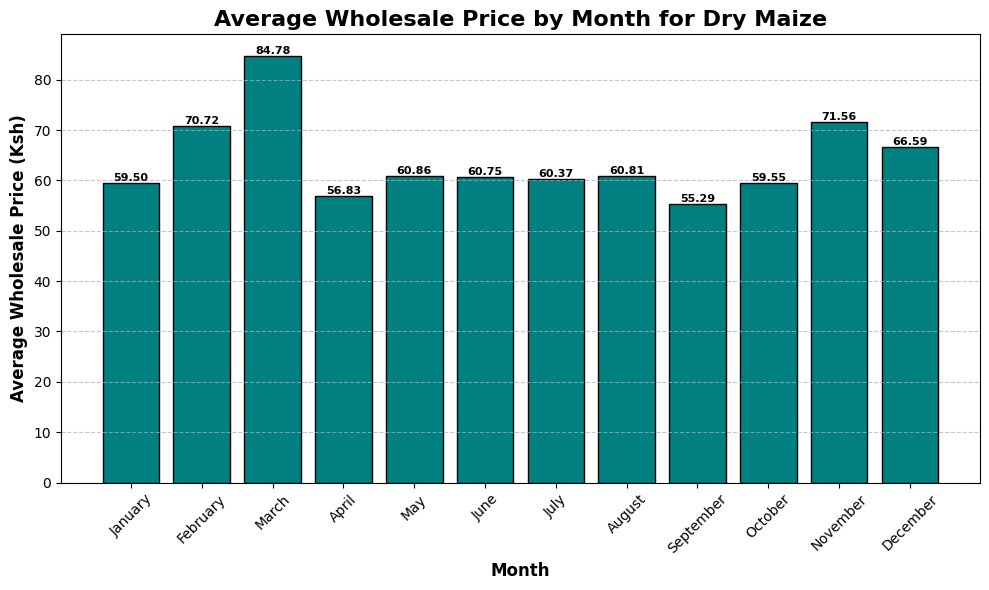

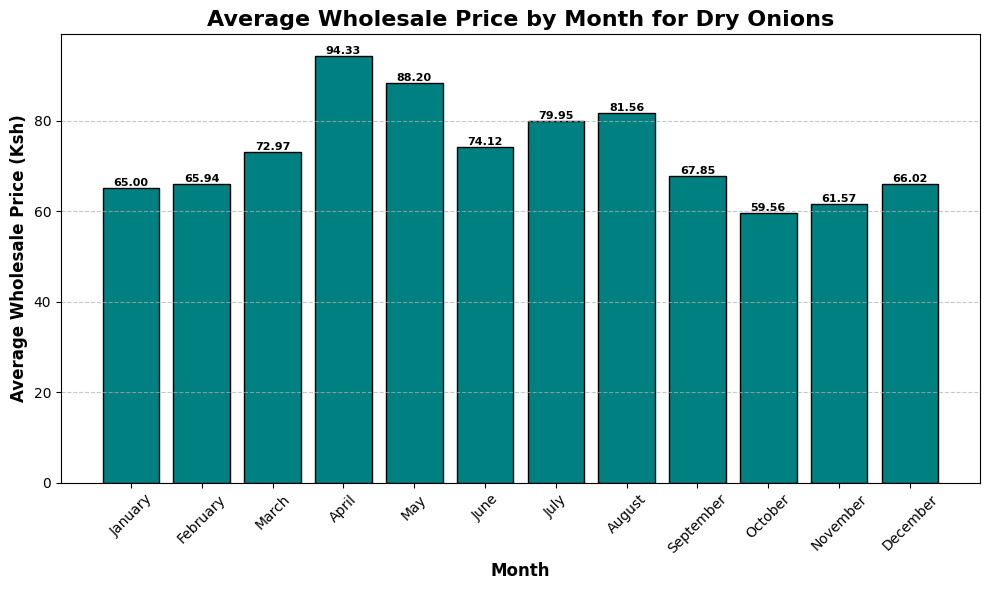

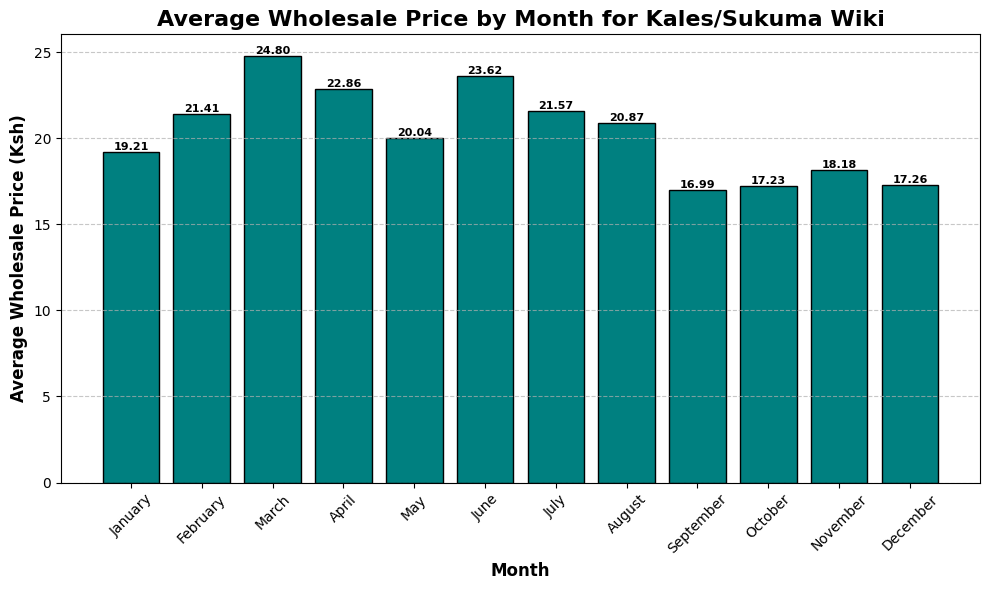

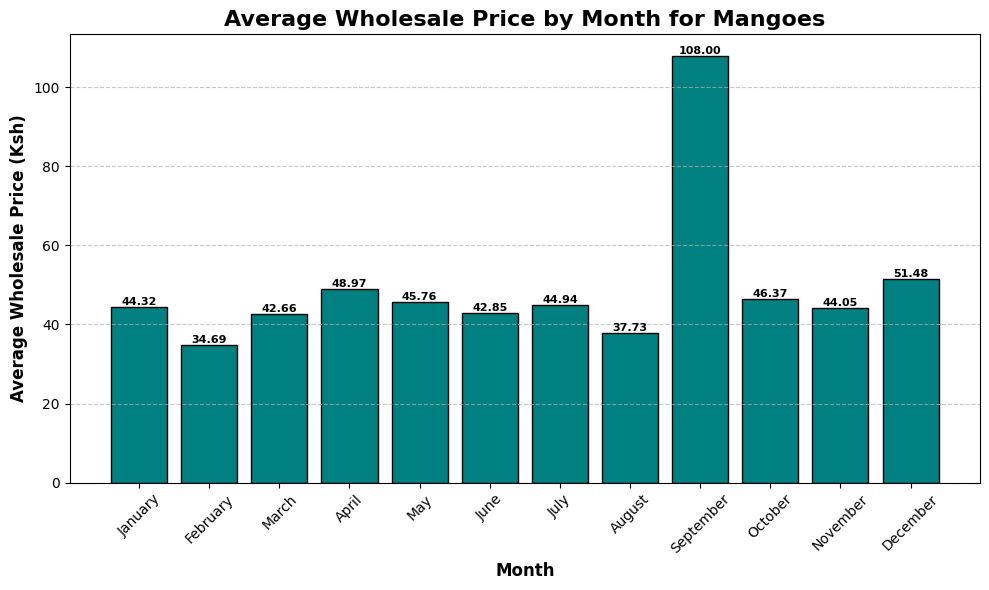

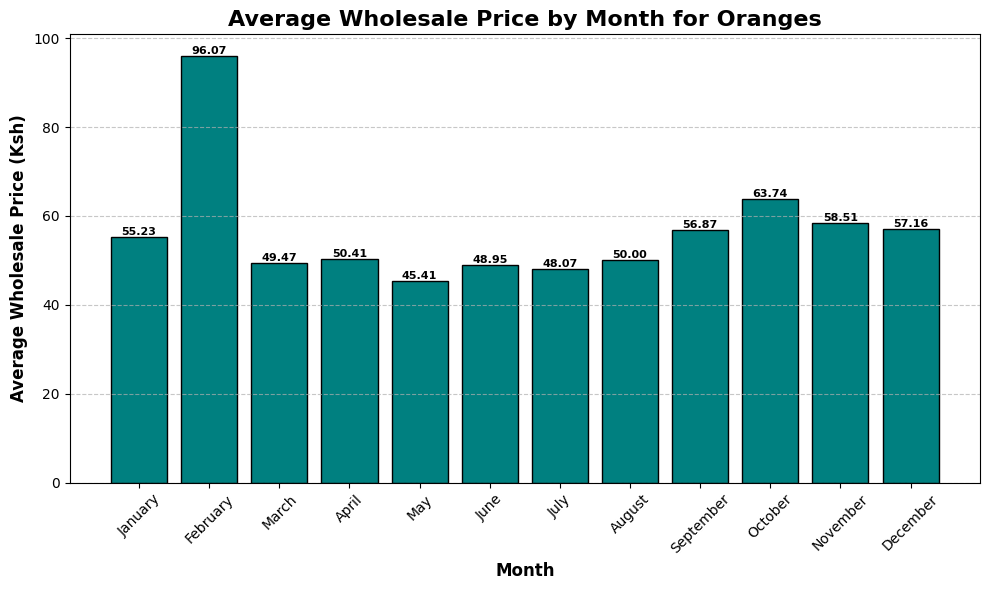

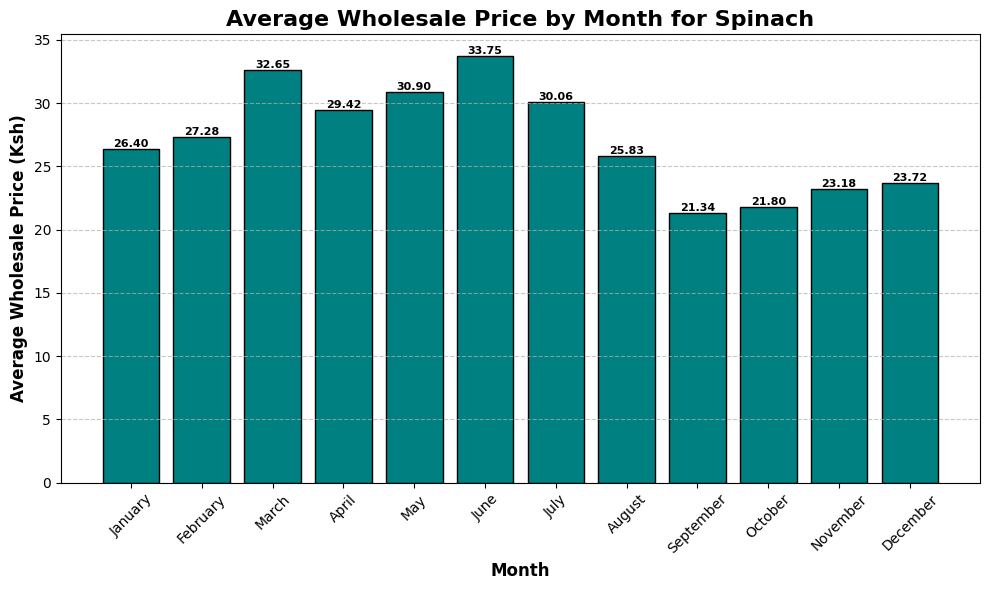

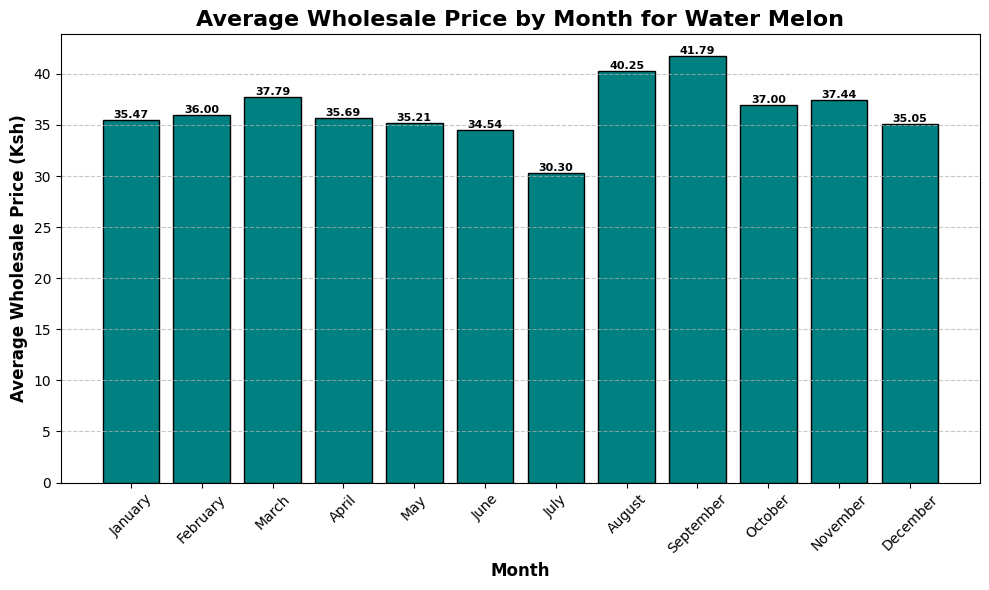

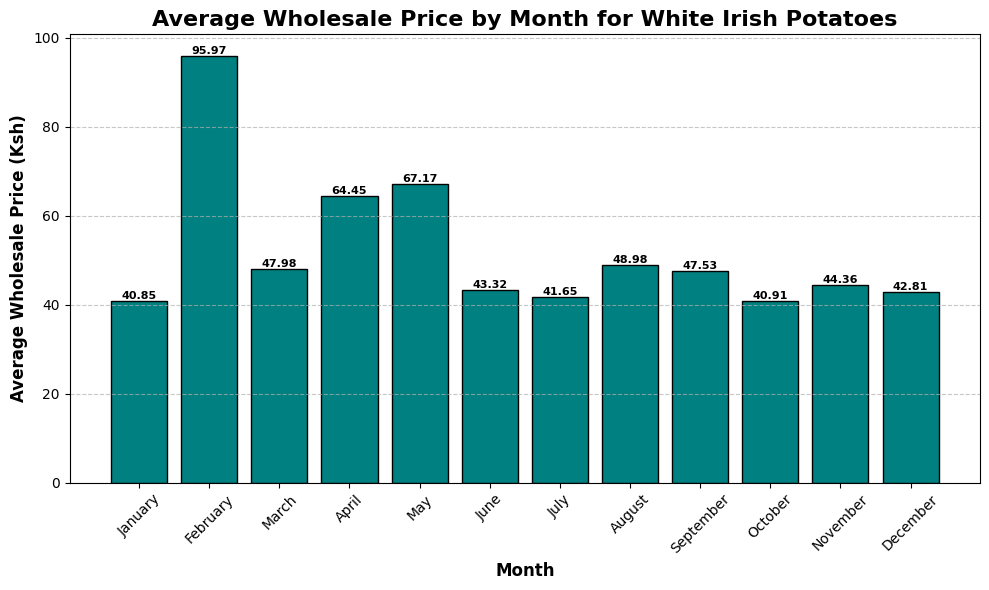

In [12]:
#Creating the function
def visualize_avg_price_by_month(df):
    """
    Visualizes bar graphs of average wholesale prices by months for each product.

    Parameters:
        df (DataFrame): The data containing 'Product', 'Month', and 'Wholesale Price'.

    Returns:
        None
    """
    #Ordering the months
    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)
    
    #Group by product and month to calculate average wholesale prices
    avg_price_by_month = df.groupby(["Product", "Month"])["Wholesale Price"].mean().reset_index()
    products = avg_price_by_month["Product"].unique()
    for product in products:
        product_data = avg_price_by_month[avg_price_by_month["Product"] == product]
        plt.figure(figsize=(10, 6))
        bars = plt.bar(product_data['Month'], product_data["Wholesale Price"], color="teal", edgecolor="black")
        #Annotating the bars
        for bar in bars:
            plt.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_height(),  
                f"{bar.get_height():.2f}",
                ha="center", va="bottom", fontsize=8, fontweight="bold"
            )
        #Formatting the plot
        plt.title(f"Average Wholesale Price by Month for {product}", fontweight="bold", fontsize=16)
        plt.xlabel("Month", fontweight="bold", fontsize=12)
        plt.ylabel("Average Wholesale Price (Ksh)", fontweight="bold", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle="--", alpha=0.7)
        plt.tight_layout()
        #Saving the plot
        safe_product_name = product.replace("/", "_")
        plt.savefig(f"{safe_product_name}_best_prices.png", dpi=300)
        plt.show()

#Calling out the function
visualize_avg_price_by_month(df)

### Findings
* **Cooking Bananas**
  * **Best time:** The month of September registered an average price of Ksh 36.70 per kilo making it the best time for sell.
  * **Worst time:** The month of October had the lowest average price of Ksh 23.26 and this could be due to abundant harvests in October could lead to oversupply, driving prices down.

* **Ripening Bananas**
  * **Best time:** During the month of September is when the price is at peak going Ksh 33.82 per kilo.
  * **Worst time:** May, with prices dropping to Ksh 23.99 with the assumption of increased supply which could result from favorable growing conditions thus reducing prices.

* **Dry Maize**
  * **Best time:** The best month for selling Dry maize is March which had high average price of Ksh 84.78
  * **Worst time:** In the month of September the price dropped to Ksh 55.29 making it the worse time for farmers to make a profit.
* **Dry Onions**
  * **Best time:** April, with an average price of Ksh 94.33 which could be because of limited harvests during this period.
  * **Worst time:** In October the prices fell to Ksh 59.56 making it the worst month to sell the product.

* **Kales (Sukuma Wiki)**
  * **Best time:** On March the average price of Kales per kilo was at  Ksh 24.80 making it the best period to sell.
  * **Worst time:** September had the lowest price of Ksh 16.99 per kilo making it the worst period to sell Kales.

* **Mangoes**
  * **Best time:** September had prices of Mangoes going for Ksh 108.00 per kilo as this period marks the end of the main mango season, with reduced supply driving prices up.
  * **Worst time:** The month of February had a sharp decline to Ksh 34.69 making it the worst period for farmers to sell Mangoes.

* **Oranges**
  * **Best time:** February is the best time to sell Oranges with an average price of Ksh 96.07 per kilo.
  * **Worst time:** The month of May had prices dropping to Ksh 45.41 making it the worst time to sell oranges.

* **Spinach**
  * **Best time:** For Spinach,June is the best time to sell as the average price per kilo is Ksh 33.75.
  * **Worst time:** The month of September is the worst time to make sales since the average price per kilo was at Ksh 21.34.

* **Watermelon**
  * **Best time:** The month of September had a peak price of Ksh 41.79 making it the best month to sell Watermelon.
  * **Worst time:** July had the prices dropping to as low as Ksh 30.30 per kilo.

* **White Irish Potatoes**
  * **Best time:** The month of February is when prices are highest at Ksh 95.97 suggesting this is best time for the farmers to sell.
  * **Worst time:** January is the worst month as it had a significant drop of Ksh 55.12 making the price per kilo at Ksh 40.85

### Which are the top 3 priced markets per county?
* To answer this, let's group the county, market and product data by wholesale price.

In [13]:
#Group by county and market area
top_markets = df.groupby(["County Area", "Market Area", "Product"])[["Wholesale Price"]].mean().reset_index()

#Finding the top 3 markets per county
top_markets_per_county = top_markets.groupby(["County Area", "Product"]).apply(lambda x: x.nlargest(3, "Wholesale Price")).reset_index(drop=True)

#Adjusting display settings to display the entire dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None) 

display(top_markets_per_county)

,County Area,Market Area,Product,Wholesale Price
0,Kirinyaga,Kagio,Banana (Cooking),22.236842
1,Kirinyaga,Kutus,Banana (Cooking),20.868836
2,Kirinyaga,Makutano Kirinyaga,Banana (Cooking),20.703750
3,Kirinyaga,Kerugoya,Banana (Ripening),26.765957
4,Kirinyaga,Kutus,Banana (Ripening),23.797637
5,Kirinyaga,Kagio,Banana (Ripening),21.466879
6,Kirinyaga,Ngurubani Market,Dry Maize,81.211049
7,Kirinyaga,Kerugoya,Dry Maize,53.232431
8,Kirinyaga,Kutus,Dry Maize,51.033439
9,Kirinyaga,Makutano Kirinyaga,Dry Onions,89.188514


### Findings
* **Kirinyaga County**
  * **Ngurubani Market:** Highest priced for Dry Maize at Ksh 81.21.
  * **Makutano Kirinyaga:** Leads in Dry Onions at Ksh 89.19.
  * **Kutus:** Notable for high prices of Banana (Ripening) at Ksh 23.80 and Kales/Sukuma Wiki at Ksh 22.71.

* **Meru County**
  * **Gakoromone:** Dominates with the highest prices for Banana (Ripening) at Ksh 80.00, Mangoes at ksh 95.38, Oranges at ksh 187.23 and Spinach Ksh 80.54
  * **Kangeta:** High prices for Dry Onions at Ksh 91.58 and Kales/Sukuma Wiki at Ksh 30.61.
  * **Nkubu:** Among the top markets for White Irish Potatoes selling at Ksh 74.48 per kilo.

* **Nairobi County**
  * **Gikomba:** Highest prices for White Irish Potatoes at Ksh 106.75, Dry Onions at Ksh 94.03 and Watermelon at Ksh 80.
  * **Nairobi Wakulima:** Notable for high prices of Kales/Sukuma Wiki which is selling at Ksh 32.50 and Spinach at Ksh 33.33
  * **Kawangware:** Dry Maize was selling at Ksh 59.67 per kilo

* **Nakuru County**
  * **Molo:** Highest prices for Dry Maize Ksh 280.91 and Dry Onions Ksh 190.14
  * **Bahati:** Top market for Water Melon as it was selling at Ksh 176.73 per kilo.
  * **Nakuru Wakulima:** Among the top markets for Banana (Ripening) selling at Ksh 80.00 and Mangoes at Ksh 80.40.

* **Nyandarua County**
  * **Mairo-inya:** Leads with high prices for Banana (Cooking) at Ksh 56.52 and Kales/Sukuma Wiki at Ksh 16.96.
  * **Engineer:** Top prices for Oranges as it wa selling at Ksh 66.88 and Watermelon at Ksh 53.22.
  * **Soko Mpya:** Among the highest for Dry Onions as it was selling at ksh 66.44 and Mangoes at Ksh 48.27.

### Insights
 * **Dry Maize:**
The prices are lowest during the third quater and recover in the fourth quarter while the monthly fluctuations suggest supply-driven price drops in mid-year. The top market for Dry Maize is Molo Market in Nakuru County, which commands the highest price of Ksh 280.91, followed by Ngurubani in Kirinyaga County at Ksh 81.21. Nairobi County markets, such as Kawangware, also offer competitive pricing.
 * **White Irish Potatoes:**
The wholesale prices declined steadily throughout the year, but retail prices showed opportunities for better returns in the second quater of the year and and the last quarter. The Gikomba Market in Nairobi County recorded the highest price at Ksh 106.75, followed by Nkubu Market in Meru County at Ksh 74.48 and Nakuru Wakulima Market in Nakuru County at Ksh 73.64.
 * **Dry Onions:**
The Dry Onions prices for both wholesale and retail peaked in the first quarter and gradually declined through the last quarter with spikes in April and December. Molo Market in Nakuru County dominated the market with the highest price of Ksh 190.14, followed by Makutano Kirinyaga of Kirinyaga County selling at Ksh 89.19 and Gikomba Market in Nairobi County at Ksh 94.03.
 * **Watermelons:**
Prices spiked in the third quarter due to reduced supply and dropped significantly both in the first and last quarter. Bahati Market in Nakuru County recorded the highest prices at Ksh 176.73 per kilo, followed by Gikomba Market in Nairobi County at Ksh 80.00 and Engineer Market Nyandarua County at Ksh 53.22.
 * **Ripening Banana:**
The wholesale prices peaked in the third quarter and dropped consistently through the last quarter suggesting oversupply during the mid year which could have led to price drop. The top markets for Ripening Banana are Gakoromone Market in Meru County with Ksh 80.00, followed by Nakuru Wakulima Market in Nakuru County at Ksh 80.00 and Makutano Kirinyaga Market in Kirinyaga County which was selling at Ksh 23.80.
 * **Oranges:**
Both the wholesale and retail prices increased steadily through the third quarter and fourth quarter after dropping in the second quarter, driven by seasonal harvest patterns. Gakoromone Market Meru County is the leading market with Ksh 187.23, followed by Engineer Market in Nyandarua County at Ksh 66.88 and Bahati Market in Nakuru County at Ksh 66.48
 * **Mangoes:**
The prices steadily rose until peaking in the third quarter, then sharply declined in the last quarter. The highest prices are observed in Gakoromone Market in Meru County at Ksh 95.38, Nakuru Wakulima Market in Nakuru County at Ksh 80.40 and Soko Mpya in Nyandarua County at Ksh 48.27.
 * **Kales (Sukuma Wiki):**
Prices peaked in Q1 and declined consistently from the second quarter to the last quarter. The top markets are Nairobi Wakulima Market in Nairobi County at Ksh 32.50, followed by Kangeta Market in Meru County at Ksh 30.61 and Kutus Market Kirinyaga County at Ksh 22.71.
 * **Spinach:**
The prices peaked in June and declined through the last quarter, with some recovering in December correlating with seasonal supply. The top markets are Gakoromone Market in Meru County which recorded the highest price of Ksh 80.54, followed by Nairobi Wakulima Market in Nairobi County at Ksh 33.33 and Ngurubani Market in Kirinyaga County at Ksh 21.78.
 * **Cooking Banana:**
Prices peaked in the third quarter and dropped through the last quarter which could be due to seasonal changes in supply. The top markets are Mairo-Inya Market in Nyandarua County at Ksh 56.52, followed by Kutus Market in Kirinyaga County at Ksh 36.70 and Nkubu Market in Meru County at Ksh 32.19.
### Recommendations
 * **Dry Maize:**
Farmers in Nakuru, Kirinyaga and Nairobi counties should store maize harvested during Q3 and sell in Q1 or Q4 when prices are higher. They should also consider in investing in proper storage facilities to help maintain quality during the holding period to maximize profits.
 * **White Irish Potatoes:**
Farmers in Nairobi, Meru and Nakuru counties should focus on retail markets during the second and fourth quarter to capitalize on price spikes by supplying potatoes at large volumnes. Also the farmers can diversify into other crops to mitigate losses during offset falling of wholesale prices
 * **Dry Onions:**
Farmers in Nakuru, Kirinyaga and Nairobi counties should target sales during the early months of the year and December when prices are highest. They should also implementing staggered planting cycles to ensures steady supply during periods when there is high demand.
 * **Watermelons:**
Farmers in Nakuru, Nairobi and Nyandarua counties should plant early in the year to align harvests with the third quarter when there is reduced supply and higher prices. Managing supply during the last quarter can help prevent market saturation hence stabilizing prices that are beneficial to the farmers.
 * **Ripening Banana:**
Farmers in Meru, Nakuru and Kirinyaga counties should plan for staggered harvesting in order to align with the third quarters high prices. Additionally, diversifying the markets could stabilize income during price dips in the fourth quater.
 * **Oranges:**
Farmers in Meru, Nyandarua and Nakuru counties should capitalize on high prices in the third and fourth quarter. Also they should invest in value addition, such as producing orange juice to enhance profitability during oversupply periods.
 * **Mangoes:**
Farmers in Meru, Nakuru and Nyandarua counties should sell fresh mangoes in the third quarter to maximize returns and also try processing mangoes into juice or dried products to ensure steady income during the low-price periods.
 * **Kales (Sukuma Wiki):**
Farmers in Nairobi, Meru and Kirinyaga counties should plan for the first quarter harvests to leverage the high prices.Moreover, they can adopt to changes during dry months to stabilize supply and maintain consistent quality during harvesting.
 * **Spinach:**
Farmers in Meru, Nairobi and Kirinyaga counties should schedule production to ensure availability in June for higher returns. The can grow alternative crops to help balance revenue during periods of low prices.
 * **Cooking Banana:**
Farmers in Nyandarua, Kirinyaga and Meru Counties should harvest strategically to align with high-demand periods in the third quarter to take advantage of the peak prices. They should also strengthen or explore local market networks to ensure consistent demand throughout the year.
#### Top Priced Markets
Farmers should know that high prices are concentrated in urban markets like Nairobi and peri-urban areas such as Meru in Gakoromone thus need to leverage these high-priced markets by organizing transport logistics or working with wholesalers who target these areas.
Additionally, farmers should form partnerships with market vendors to secure competitive prices for premium produce and utilizing digital platforms to track live market prices and identify profitable sales opportunities.
When farmers adopt these strategies,they can maximize their profitability and mitigate risks associated with seasonal price fluctuations.